



__Описание полей__




>Date:        Дата 
---
>Visits:     Кол-во визитов на сайт в день
---
>Conversion: Кол-во конвертнувшихся в поле «Добавлен в корзину» в день
---
>Sales: Кол-во продаж в день



Однако жаль, что не пошел дальше: в данных есть несколько строк с разными суммами на одну и ту же дату. К сожалению это часто встречается и какого-то универсального решения как правильно эти дубликаты удалить не существует. Тут можно было решить самому, как-то это обосновав в комментах.
 
Также тобой не были найдены даты, которые отсутствовали в df, да, это не было условием задачи, однако на практике часто бывает, что кто-то что-то просмотрит, даст тебе не все данные. Если это удаётся обнаружить заранее, то это сильно экономит время, которое потом затратишь на переделывание всей аналитики.
Это ни на что не влияет в оценке твоей работы, просто обратил внимание т.к. аналитику могут подсовывать самые разные «ловушки» в данных.
 
Понравился прием обновления данных через update и временную таблицу однако это сыграло злую шутку: у тебя появились дубли в датах, которые ты потом не отработал.

# Импорт библиотек


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузить данные из data.csv

In [ ]:
data = pd.read_csv('data.csv', sep='\\t' )

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
data

,Date,Visits,Conversions,Sales
0,01-Apr-2020,1732.0,242,170
1,02-Apr-2020,1690.0,302,190
2,03-Apr-2020,1585.0,277,199
3,04-Apr-2020,1613.0,256,190
4,05-Apr-2020,1660.0,198,155
...,...,...,...,...
1131,07-Aug-2020,1042.0,276,216
1132,08-Aug-2020,939.0,278,211
1133,09-Aug-2020,860.0,233,190
1134,10-Aug-2020,911.0,273,210


# Вывести описательную статистику по полям


In [ ]:
data.describe()

,Visits,Conversions,Sales
count,1136.000000,1136.000000,1136.000000
mean,1207.187500,256.922535,174.939261
std,423.249078,46.458652,36.383043
min,527.000000,128.000000,43.000000
25%,915.000000,224.000000,152.000000
50%,1112.000000,252.000000,176.500000
75%,1402.500000,285.000000,199.000000
max,3421.000000,417.000000,562.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1136 non-null   object 
 1   Visits       1136 non-null   float64
 2   Conversions  1136 non-null   int64  
 3   Sales        1136 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 35.6+ KB


In [ ]:
data.nunique()

Date           346
Visits         306
Conversions    151
Sales          136
dtype: int64

In [ ]:
data.value_counts()

Date        Visits  Conversions  Sales
2020-08-11  830.0   279          200      4
2020-05-20  933.0   268          177      4
2020-05-04  864.0   240          174      4
2020-05-05  827.0   240          167      4
2020-05-06  930.0   232          172      4
                                         ..
2019-10-10  1643.0  238          154      1
2020-07-02  3421.0  255          200      1
2019-10-11  1945.0  316          189      1
2020-05-08  903.0   252          562      1
2019-10-09  2143.0  257          153      1
Length: 351, dtype: int64

# Обработка пропущенных знакчений

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data = data.sort_values('Date').reset_index(drop=True)

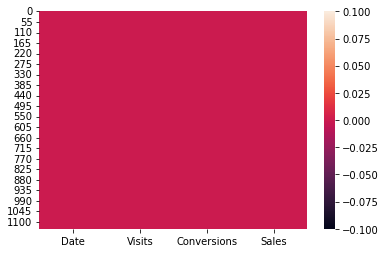

In [ ]:
sns.heatmap(data.isnull())

# Создать столбец год в датафрейме, заполнить значениями из Date , назвать его Y


In [ ]:
data['Y'] = data['Date'].dt.year

# Посчитать долю продаж по отношению к визитам. округлить до второго знака, записать данные в столбец Conv_Sales

In [ ]:
data['Conv_Sales'] = np.round(data['Sales'] / data['Visits'], decimals=2)

# Убрать из датафрейма случаи, когда количество визитов больше 3200 или Доля продаж по отношению к визитам меньше 0,05 

In [ ]:
data = data[data['Visits'] <= 3200]
data = data[data['Conv_Sales'] >= 0.05]
data.reset_index(drop=True, inplace=True)

# Каждый 7, 17 и 27 день месяца мы проводим акции, Создайте новый столбец Flag_Act, в котором 1- это месяц акции, 0 - нет

In [ ]:
stock_days = [7, 17, 27]
data['Flag_Act'] = data['Date'].dt.day.isin(stock_days).astype('int')
data.head(10)

,Date,Visits,Conversions,Sales,Y,Conv_Sales,Flag_Act
0,2020-04-01,1732.0,242,170,2020,0.10,0
1,2020-04-02,1690.0,302,190,2020,0.11,0
2,2020-04-03,1585.0,277,199,2020,0.13,0
3,2020-04-04,1613.0,256,190,2020,0.12,0
4,2020-04-05,1660.0,198,155,2020,0.09,0
5,2020-04-06,1795.0,257,180,2020,0.10,0
6,2020-04-07,1590.0,341,179,2020,0.11,1
7,2020-04-08,1513.0,249,164,2020,0.11,0
8,2020-04-09,1225.0,241,170,2020,0.14,0
9,2020-04-10,1145.0,295,212,2020,0.19,0


# Сгруппировать датафрейм по столбцам Y и Flag_Act, и вывести среднюю Долю продаж по отношению к визитам. Назвать столбец "Avg_Conv_Sales". Датафрейм назвать df_agg


In [ ]:
df_agg = data.groupby(['Y', 'Flag_Act']).mean()[['Conv_Sales']]

In [ ]:
df_agg.rename(columns = {'Conv_Sales' : 'Avg_Conv_Sales'}, inplace = True) 

In [ ]:
df_agg

Avg_Conv_Sales
Y    Flag_Act                
2019 0               0.098304
     1               0.104167
2020 0               0.185616
     1               0.179091

# !Пришла информация о том, что появились обновленные данные по продажам (data_corr.csv): новые данные содержат как новые даты, так и корректировки к старому датафрейму. 
# Вам необходимо добавить новые данные к старому датафрейму: 
>## 1)Если даты уже были в старом датафрейме, то заменить базовые данные(Visits,Conversions,Sales) на данные из файла data_corr. 
>## 2)Если таких дат не было, то заполнить их данными из файла data_corr. 
>## 3)Информацию по тем датам, которых нет в data_corr, оставить без изменений (как в старом датафрейме)
# К новосформированному датафрейму применить все те же условия и группировки, что и для старого датафрейма (Ограничения на количество визитов, долю продаж, акционные дни и тп)

In [ ]:
data_corr = pd.read_csv('data_corr.csv', sep='\\t')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
data_corr['Date'] = pd.to_datetime(data_corr['Date'])

In [ ]:
tmp = data.set_index('Date')
tmp.update(data_corr.set_index('Date'))
tmp = pd.concat([tmp, data_corr.set_index('Date')])

In [ ]:
tmp['Date'] = tmp.index
tmp.index = np.arange(tmp.shape[0])

In [ ]:
names_columns = ['Date', 'Visits', 'Conversions', 'Sales', 'Y', 'Conv_Sales', 'Flag_Act']
data_2 = tmp.reindex(columns=names_columns)

In [ ]:
data_2['Y'] = data_2['Date'].dt.year
data_2['Conv_Sales'] = np.round(data_2['Sales'] / data_2['Visits'], decimals=2)
data_2 = data_2[data_2['Visits'] <= 3200]
data_2 = data_2[data_2['Conv_Sales'] >= 0.05]
data_2['Flag_Act'] = data_2['Date'].dt.day.isin(stock_days).astype('int')
data_2.nunique()

Date           350
Visits         309
Conversions    156
Sales          141
Y                2
Conv_Sales      30
Flag_Act         2
dtype: int64

# Получите аггрегацию по столбцам Y и Flag_Act в новом датафрейме. Выведите среднюю Долю продаж по отношению к визитам в новом датафрейме.  

# Покажите абсолютное изменение этого показателя в старом датафрейме(до корректировки) с новым датафреймом(после корректировки). Округлите его до четвертого знака после запятой

In [ ]:
df_agg_2 = data_2.groupby(['Y', 'Flag_Act']).mean()[['Conv_Sales']]
df_agg_2.rename(columns = {'Conv_Sales' : 'Avg_Conv_Sales'}, inplace = True) 
df_agg_2

Avg_Conv_Sales
Y    Flag_Act                
2019 0               0.098304
     1               0.104167
2020 0               0.175540
     1               0.170000

In [ ]:
df_abs_diff = np.round((df_agg_2 - df_agg).abs().rename(columns={'Avg_Conv_Sales' : 'ACV_abs_diff'}), decimals=4)
df_abs_diff

ACV_abs_diff
Y    Flag_Act              
2019 0               0.0000
     1               0.0000
2020 0               0.0101
     1               0.0091

# Визуализируйте данные и/или изменение старого и нового датафрейма любым способом, который посчитаете информативным

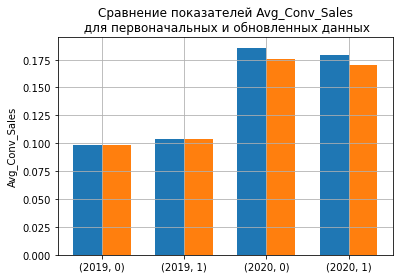

In [ ]:
ind_str = [str(x) for x in df_abs_diff.index]
x = np.arange(len(ind_str))

width = 0.35

p1 = plt.bar(x - width/2, df_agg['Avg_Conv_Sales'], width, label='Old df')
p2 = plt.bar(x + width/2, df_agg_2['Avg_Conv_Sales'], width, label='New df')

plt.ylabel('Avg_Conv_Sales')
plt.title('Сравнение показателей Avg_Conv_Sales\n для первоначальных и обновленных данных')
plt.xticks(x, ind_str)
plt.grid()

plt.show()

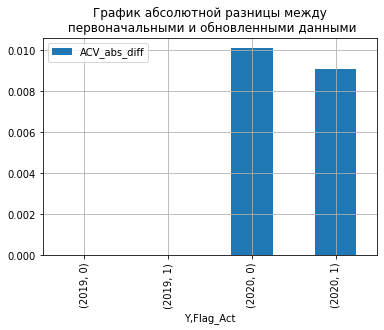

In [ ]:
df_abs_diff.plot(
    kind='bar',
    grid=True,
    title='График абсолютной разницы между\n первоначальными и обновленными данными',
)
pass